**Implementation of Spatial modulation and SSK**

*Designed a Spatial Modulation and a SSK system and plotted their BER performance using Python*

Text(0, 0.5, 'BER')

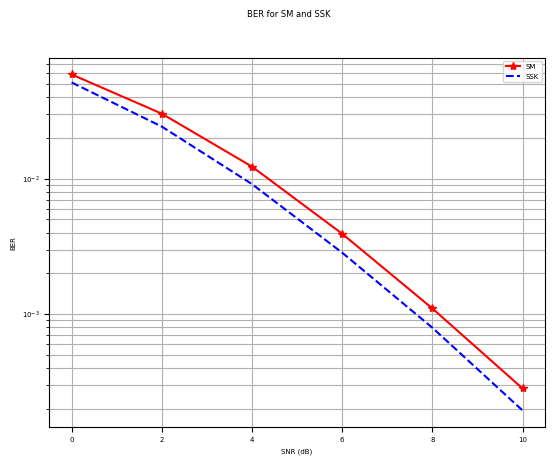

In [ ]:
import numpy as np
import numpy.linalg as nl
import numpy.random as nr
import matplotlib.pyplot as plt
import numpy.matlib as nm

#In SM, only one antenna is active
#The choicce of active antenna is made using log2Nt bits

SNRdB = np.arange(0,11,2);
iter = 100000;
Nt = 4; Nr = 4;
M = 2;
bpcu_spatial = np.log2(Nt) + np.log2(M);
bpcu_ssk = np.log2(Nt)

BERopt_spatial = np.zeros(len(SNRdB));
BERopt_ssk = np.zeros(len(SNRdB));
for ite in range(iter):
    H = (nr.normal(0,1,(Nr,Nt))+ 1j*nr.normal(0,1,(Nr,Nt)))/np.sqrt(2)
    N = (nr.normal(0,1,(Nr,1))+ 1j*nr.normal(0,1,(Nr,1)))/np.sqrt(2)
    # Y= root(P)HX + N --> system model
    #H-  channel coefficient matrix
    #N - random noise vector
    isym = nr.randint(2**bpcu_spatial)
    antIndex_spatial = isym % 4;
    antIndex_ssk = nr.randint(2*bpcu_ssk)
    X = 2*(isym > 3)-1#Transmitted symbols
    #Spatial modulation
    for k in range(len(SNRdB)):
        P_spatial = 10**(SNRdB[k]/10)
        Y_spatial = np.sqrt(P_spatial)*H[:,antIndex_spatial:antIndex_spatial+1]*X + N
        #Optimal decoder = min || Y - S ||^2
        # S - contains all possibilities of BPSK symbols
        opt_dec_spatial = np.argmin(np.sum(np.absolute(np.sqrt(P_spatial)*np.concatenate((-H,H), axis = 1) - nm.repmat(Y_spatial, 1, 2*Nt))**2,axis=0))
        BERopt_spatial[k] = BERopt_spatial[k] + (opt_dec_spatial != isym)

    #SSK modulation
    for k in range(len(SNRdB)):
        P_ssk = 10**(SNRdB[k]/10)
        Y = np.sqrt(P_ssk)*H[:,antIndex_ssk:antIndex_ssk+1] + N
        opt_dec = np.argmin(np.sum(np.absolute(np.sqrt(P_ssk)*H - nm.repmat(Y, 1, Nt))**2,axis=0))
        BERopt_ssk[k] = BERopt_ssk[k] + (opt_dec != antIndex_ssk)
BERopt_ssk = BERopt_ssk/(bpcu_ssk*iter)
BERopt_spatial = BERopt_spatial/(bpcu_spatial*iter)

plt.yscale('log')
plt.plot(SNRdB, BERopt_spatial,'r-*', label= 'SM');
plt.plot(SNRdB, BERopt_ssk,'b--', label= 'SSK');
plt.grid(1,which='both')
plt.suptitle('BER for SM and SSK')
plt.legend()
plt.xlabel('SNR (dB)')
plt.ylabel('BER')

*Observation: The channel capacity of AWGN > capacity of SIMO > capacity of SISO and the capacity increases with increase in SNR in all the cases. So, as number of antennas increases the capacity increases and the AWGN channel has highest SNR.*